(sec_quickstart)=

# Quickstart

This page gives some simple examples of how to use the major features
of {program}`msprime`, with links to more detailed documentation
and tutorial content.

See the {ref}`sec_installation` page for instructions on installing 
{program}`msprime` (short version: ``pip install msprime`` or 
``conda install -c conda-forge msprime`` will work for most users).

(sec_quickstart_ancestry)=

## Ancestry

Msprime simulates ancestral histories for a set of sample genomes 
using backwards-in-time population genetic models.
Here we run a simple simulation of a short recombining sequence under
human-like parameters:

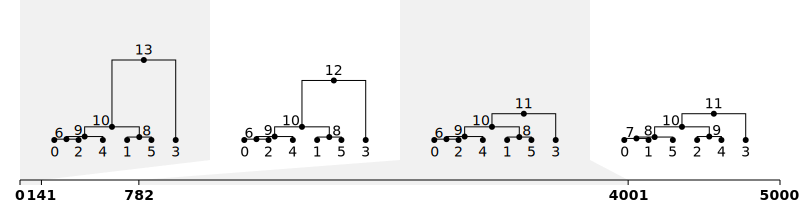

In [1]:
    import msprime
    from IPython.display import SVG

    # Simulate an ancestral history for 3 diploid samples under the coalescent
    # with recombination on a 5kb region with human-like parameters.
    ts = msprime.sim_ancestry(
        samples=3, 
        recombination_rate=1e-8, 
        sequence_length=5_000,
        population_size=10_000, 
        random_seed=123456)
    # Visualise the simulated ancestral history.
    SVG(ts.draw_svg())

In this example we simulate the ancestral history of three diploid 
individuals (see {ref}`sec_ancestry_samples` and {ref}`sec_ancestry_ploidy`)
for a 5kb sequence with a 
[recombination](<https://en.wikipedia.org/wiki/Genetic_recombination>)
rate of {math}`10^{-8}` 
(see {ref}`sec_ancestry_genome_properties`)
from a population with a constant size of 10,000 (see 
the {ref}`sec_quickstart_demography` section below)
under the default 
[coalescent](<https://en.wikipedia.org/wiki/Coalescent_theory>)
ancestry model (see the {ref}`sec_ancestry_models` for details on 
other available models).
To ensure that 
the output of this example is predictable, we set a random seed 
(see {ref}`sec_ancestry_random_seed`).

When recombination is present, the ancestry of a sample of DNA sequences
cannot be represented by a single genealogical tree relating the 
samples to their genetic ancestors; there is instead
a *sequence* of highly correlated trees along the genome.
The result of our simulation is therefore a [tree sequence](https://tskit.dev)
object from the {ref}`tskit <tskit:sec_introduction>` library,
which provides a rich suite of operations for 
analysing these genealogical histories: see the 
{ref}`tutorials:sec_tskit_getting_started` tutorial for help. 
In this example we show a visualisation
of the four different trees along the 5kb region 
(see the {ref}`tutorials:sec_tskit_viz` tutorial for more 
examples).  Because we have specified three diploid sample 
*individuals*, each of these trees has 6 "sample" nodes 
(the "leaves" or "tips"), because each diploid individual
has two monoploid genomes (see {ref}`sec_ancestry_samples`).

See the {ref}`sec_ancestry` section for more details on 
ancestry simulations.

## Mutations

```{eval-rst}
.. todo:: This is a WIP
```

The {func}`.sim_ancestry` function generates a simulated ancestral
history for some samples. 
If we want [genome sequence](<https://en.wikipedia.org/wiki/Genome>)
we must also simulate some
[mutations](<https://en.wikipedia.org/wiki/Mutation>) on these trees.
However, it's important to note that it's not always necessary to 
simulate mutations in order to use the simulations; often, it's 
better *not to*; see the 
% TODO enable this once the tutorials build is fixed
% {ref}`tutorials:sec_tskit_no_mutations` 
tutorial for more information.

In [2]:
mutated_ts = msprime.sim_mutations(ts, rate=1e-8, random_seed=54321)
mutated_ts.tables.sites

id,position,ancestral_state,metadata
0,90.00000000,T,
1,333.00000000,G,
2,819.00000000,T,
3,3204.00000000,A,


In [3]:
mutated_ts.tables.mutations

id,site,node,time,derived_state,parent,metadata
0,0,10,12191.4064954057,G,-1,
1,1,10,44173.26473294006,C,-1,
2,2,9,9597.219523507081,G,-1,
3,3,3,1158.4291490099815,C,-1,


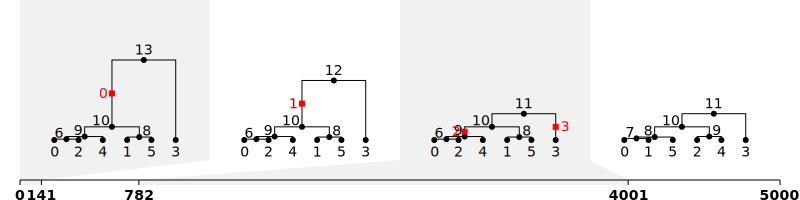

In [4]:
SVG(mutated_ts.draw_svg())

In [5]:
for variant in mutated_ts.variants():
    print(variant)

{'site': {'id': 0, 'position': 90.0, 'ancestral_state': 'T', 'mutations': [{'id': 0, 'site': 0, 'node': 10, 'time': 12191.4064954057, 'derived_state': 'G', 'parent': -1, 'metadata': b''}], 'metadata': b''}, 'alleles': ('T', 'G'), 'has_missing_data': False, 'num_alleles': 2, 'genotypes': array([1, 1, 1, 0, 1, 1], dtype=int8), 'position': 90.0, 'index': 0}
{'site': {'id': 1, 'position': 333.0, 'ancestral_state': 'G', 'mutations': [{'id': 1, 'site': 1, 'node': 10, 'time': 44173.26473294006, 'derived_state': 'C', 'parent': -1, 'metadata': b''}], 'metadata': b''}, 'alleles': ('G', 'C'), 'has_missing_data': False, 'num_alleles': 2, 'genotypes': array([1, 1, 1, 0, 1, 1], dtype=int8), 'position': 333.0, 'index': 1}
{'site': {'id': 2, 'position': 819.0, 'ancestral_state': 'T', 'mutations': [{'id': 2, 'site': 2, 'node': 9, 'time': 9597.219523507081, 'derived_state': 'G', 'parent': -1, 'metadata': b''}], 'metadata': b''}, 'alleles': ('T', 'G'), 'has_missing_data': False, 'num_alleles': 2, 'genoty

```{eval-rst}
.. todo:: Not sure how much detail we want to get into here. The salient points
    we want to get across are that mutations are not automatically part of the 
    simulation, that we only output sites with mutations and we have efficient
    ways to work with the results. A lot of this should be pointing to the 
    "getting started with tskit" tutorial.

```

```{eval-rst}
.. todo:: List of pointers to the relevant sections of the documentation.

```

(sec_quickstart_demography)=

## Demography

By default ancestry simulations assume an extremely simple
population structure in which a single randomly mating population
of a fixed size exists for all time. For most simulations this
is an unrealistic assumption, and so msprime provides a way
to describe more complex demographic histories.

In [6]:
    # Create a 1D stepping stone model of demograpy
    demography = msprime.Demography.stepping_stone_model([100] * 10, migration_rate=0.1)
    # Take one diploid sample each from the first and last demes
    samples = {0: 1, 9: 1}
    # Simulate an ancestral history for this demography and sample.
    ts = msprime.sim_ancestry(samples=samples, demography=demography)
    ts.tables.nodes

id,flags,population,individual,time,metadata
0,1,0,0,0.00000000000000,
1,1,0,0,0.00000000000000,
2,1,9,1,0.00000000000000,
3,1,9,1,0.00000000000000,
4,0,1,-1,858.95831903365752,
5,0,5,-1,1045.59130258085588,
6,0,2,-1,6799.39277301452785,


```{eval-rst}
.. todo:: Links into more detailed documentation
```